In [2]:
import pandas as pd
from prophet import Prophet

In [3]:
data = pd.read_csv('넙치.csv')
data['ds'] = pd.to_datetime(data['기간'])  # 'ds' 컬럼을 날짜 형식으로 변환
data.rename(columns={'단가': 'y'}, inplace=True)  # 종속 변수 컬럼 이름을 'y'로 변경

OutOfBoundsDatetime: Out of bounds nanosecond timestamp: 1-02-23 00:00:00 present at position 0

In [ ]:
model1 = Prophet(seasonality_prior_scale=1)
model1.fit(data)

In [22]:
future = model1.make_future_dataframe(periods=12, freq='M')  # 향후 12개월의 날짜 생성
forecast = model1.predict(future)

In [23]:
forecast['yhat'] = forecast['yhat'].apply(lambda x: max(0, x))

In [24]:
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(12)

,ds,yhat,yhat_lower,yhat_upper
25,2023-02-28,22372.315844,19290.934880,25194.928850
26,2023-03-31,33053.371927,29825.281157,36099.342113
27,2023-04-30,24830.518555,21700.145833,27913.825035
28,2023-05-31,50500.739689,47635.750261,53654.117870
29,2023-06-30,12352.216890,9512.856661,15413.651864
30,2023-07-31,20734.675588,17673.055600,23754.293264
31,2023-08-31,37471.529509,34317.623624,40287.618653
32,2023-09-30,31234.118936,28155.686762,34272.569269
33,2023-10-31,22766.108031,19627.012581,25813.103695
34,2023-11-30,36472.142358,33448.602269,39401.968476


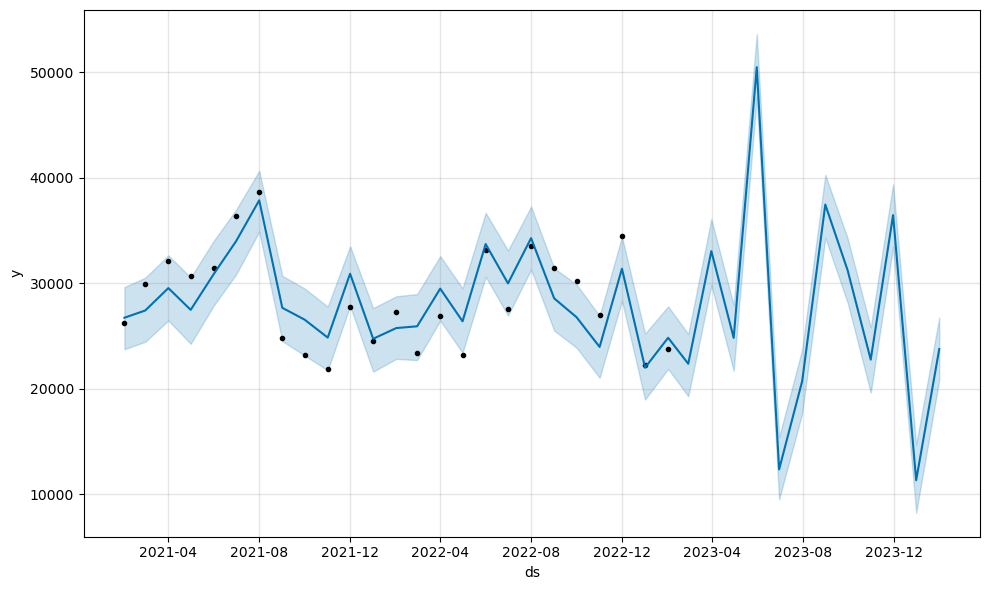

In [25]:
fig1 = model1.plot(forecast)

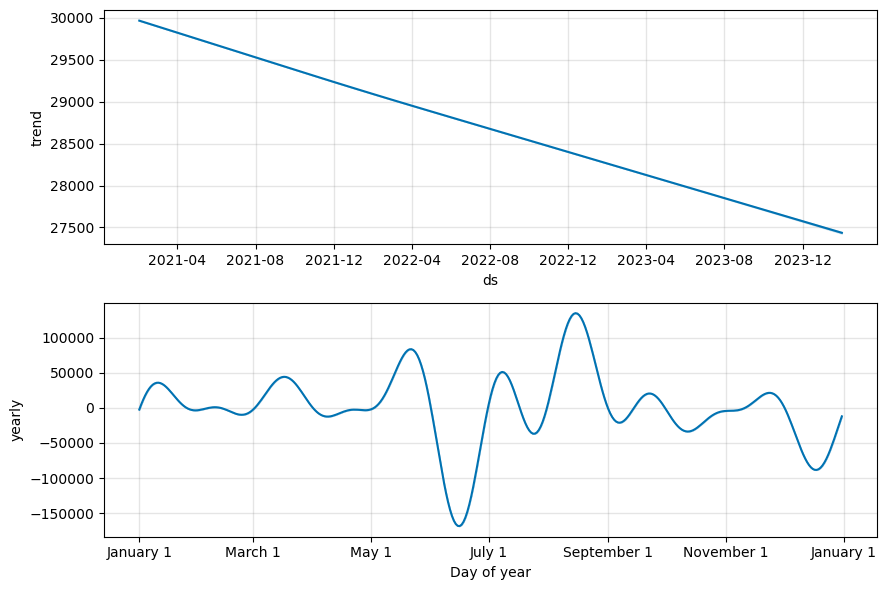

In [26]:
fig2 = model1.plot_components(forecast)

In [1]:
import pandas as pd
from sklearn.linear_model import LinearRegression

In [2]:
data = pd.read_csv('넙치.csv')

In [10]:
quantity = data['물량-평균'].values
price = data['단가'].values

In [9]:
model = LinearRegression()
model.fit(quantity.reshape(-1, 1), price)

LinearRegression()

In [5]:
print("물량과 가격 분석 결과:")
print("기울기 (회귀 계수):", model.coef_[0])
print("절편 (절편 값):", model.intercept_)

물량과 가격 분석 결과:
기울기 (회귀 계수): 3.2694211431250975
절편 (절편 값): 2119.720731516699


In [6]:
future_quantity = 50 # 예측할 물량
predicted_price = model.predict([[future_quantity]])

In [7]:
print("물량에 따른 예측 가격:")
print("물량:", future_quantity)
print("예측 가격:", predicted_price[0])

물량에 따른 예측 가격:
물량: 50
예측 가격: 2283.191788672954
